# Anomaly detection project

In [160]:
# Ignoring warning messages from python
import warnings
warnings.filterwarnings('ignore')

# General use imports
import pandas as pd
import numpy as np


# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Question 2:
   >### Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

## *I. Checking out cohorts*

In [2]:
# Getting the data

cohorts = pd.read_csv('cohorts_data.csv')
cohorts.head()

,Unnamed: 0,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,3,4,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,4,5,Everglades,#everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1


In [3]:
# Getting to know the data

cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53 non-null     int64  
 1   id          53 non-null     int64  
 2   name        53 non-null     object 
 3   slack       53 non-null     object 
 4   start_date  53 non-null     object 
 5   end_date    53 non-null     object 
 6   created_at  53 non-null     object 
 7   updated_at  53 non-null     object 
 8   deleted_at  0 non-null      float64
 9   program_id  53 non-null     int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 4.3+ KB


In [4]:
# What are the unique categories in some of the columns
# For program_id

cohorts.program_id.nunique()

4

In [10]:
cohorts.program_id.unique()

array([1, 4, 2, 3])

In [5]:
# For id

cohorts.id.nunique()

53

In [6]:
cohorts.id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  51,  52,  53,  55,  56,
        57,  58,  59,  60,  61,  62, 132, 133, 134, 135, 136, 137, 138,
       139])

In [7]:
# For name

cohorts.name.nunique()

53

In [8]:
cohorts.name.unique()

array(['Arches', 'Badlands', 'Carlsbad', 'Denali', 'Everglades',
       'Franklin', 'Glacier', 'Hampton', 'Apollo', 'Balboa', 'Ike',
       'Joshua', 'Kings', 'Lassen', 'Mammoth', 'Niagara', 'Olympic',
       'Pinnacles', 'Quincy', 'Redwood', 'Sequoia', 'Teddy', 'Ulysses',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Yosemite', 'Staff', 'Zion',
       'Ada', 'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos',
       'Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Hyperion',
       'Darden', 'Io', 'Bash', 'Jupiter', 'Kalypso', 'Easley', 'Luna',
       'Marco', 'Placeholder for students in transition', 'Florence',
       'Neptune', 'Oberon'], dtype=object)

***

## *II. Checking out logs*

In [11]:
# Getting the 2nd set of data

logs = pd.read_csv('logs_data.csv')
logs.head()

,Unnamed: 0,date,time,path,user_id,cohort_id,ip
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [12]:
# Getting to know the data

logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 48.1+ MB


In [13]:
# What are the unique categories in some of the columns
# For cohort_id

logs.cohort_id.nunique()

47

In [14]:
logs.cohort_id.unique()

array([  8.,  22.,  21.,   1.,  16.,  18.,  19.,  nan,  13.,  14.,  15.,
         7.,   4.,  12.,  17.,  23.,   2.,   9.,  11.,  24.,  25.,  26.,
         6.,  27.,  28.,  29.,  31.,  32.,  33.,  34.,  51.,  52.,  53.,
        55.,  56.,  57.,   5.,  58.,  59.,  61.,  62., 132., 134., 133.,
       135., 138., 137., 139.])

In [15]:
# For user_id

logs.user_id.nunique()

981

In [16]:
# For path

logs.path.nunique()

2313

In [17]:
# For ip

logs.ip.nunique()

5531

>### Takeaways
    
        * Cohorts:
            - There is the same number of cohort names and IDs (53), this means that all entries are unique because there are only 53 entries.
            - Unnamed, slack, created_at, updated_at, deleted_at, program_id will not be useful in identifying the lesson that was referred to the most
        * Logs
            - Unnamed will not be useful in identifying the lesson that was referred to the most

***

### *III. Creating a combined dataframe*

In [20]:
cohorts.head()

,Unnamed: 0,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,3,4,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,4,5,Everglades,#everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1


In [21]:
# Dropping unnecessary columns and displaying the names of df

cohorts = cohorts.drop(columns = ['Unnamed: 0', 'slack', 'created_at', 'updated_at', 'deleted_at', 'program_id'])
cohorts.head()

,id,name,start_date,end_date
0,1,Arches,2014-02-04,2014-04-22
1,2,Badlands,2014-06-04,2014-08-22
2,3,Carlsbad,2014-09-04,2014-11-05
3,4,Denali,2014-10-20,2015-01-18
4,5,Everglades,2014-11-18,2015-02-24


In [22]:
logs.head()

,Unnamed: 0,date,time,path,user_id,cohort_id,ip
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [35]:
# Merging cohorts and logs

combined_df = pd.merge(logs, cohorts, how = 'outer', left_on = 'cohort_id', right_on= 'id')
combined_df.head()

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date
0,0.0,2018-01-26,09:55:03,/,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06
1,1.0,2018-01-26,09:56:02,java-ii,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06
2,2.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06
3,3.0,2018-01-26,09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06
4,58.0,2018-01-26,10:40:15,javascript-i/functions,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06


In [36]:
# Converting the datetime column to datetime type and dropping unnecessary columns (date and time)

def convert_datetime(df):
    df['datetime'] = pd.to_datetime(df.date + ' ' + df.time)
    df = df.drop(columns= ['Unnamed: 0', 'date', 'time', 'id'])
    return df

In [37]:
# The combine dataframe assigned to a variable

combined_df = convert_datetime(combined_df)
combined_df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,datetime
0,/,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-01-26 09:55:03
1,java-ii,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-01-26 09:56:05
3,slides/object_oriented_programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-01-26 09:56:06
4,javascript-i/functions,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-01-26 10:40:15


In [38]:
# Reordering columns

combined_df[['datetime', 'cohort_id', 'name', 'user_id', 'path', 'start_date', 'end_date']]

,datetime,cohort_id,name,user_id,path,start_date,end_date
0,2018-01-26 09:55:03,8.0,Hampton,1.0,/,2015-09-22,2016-02-06
1,2018-01-26 09:56:02,8.0,Hampton,1.0,java-ii,2015-09-22,2016-02-06
2,2018-01-26 09:56:05,8.0,Hampton,1.0,java-ii/object-oriented-programming,2015-09-22,2016-02-06
3,2018-01-26 09:56:06,8.0,Hampton,1.0,slides/object_oriented_programming,2015-09-22,2016-02-06
4,2018-01-26 10:40:15,8.0,Hampton,1.0,javascript-i/functions,2015-09-22,2016-02-06
...,...,...,...,...,...,...,...
900224,NaT,NaN,Balboa,NaN,NaN,2015-11-03,2016-03-11
900225,NaT,NaN,Redwood,NaN,NaN,2017-07-31,2017-12-06
900226,NaT,NaN,Ada,NaN,NaN,2019-02-04,2019-06-16
900227,NaT,NaN,Io,NaN,NaN,2020-07-20,2021-01-21


***

### *IV. Looking for null values in the dataset*

In [43]:
# Displaying the number of nulls in the columns

combined_df.isnull().sum()

path              7
user_id           6
cohort_id     52899
ip                6
name          52893
start_date    52893
end_date      52893
datetime          6
dtype: int64

>**Displaying the nulls in each column to have a idea of what they correspond to in other columns**

<AxesSubplot:title={'center':'Proportion of nulls per column charted'}>

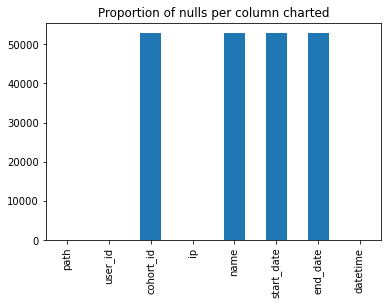

In [131]:
# Proportion of nulls charted

combined_df.isnull().sum().plot(kind='bar', title='Proportion of nulls per column charted')

In [46]:
# I am interested in the cohort_id column

combined_df[combined_df['cohort_id'].isnull()]

,path,user_id,cohort_id,ip,name,start_date,end_date,datetime
53122,/,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 16:46:16
53123,spring/extra-features/form-validation,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 16:46:24
53124,/,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 17:54:24
53125,/,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 18:32:03
53126,mysql/relationships/joins,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 18:32:17
...,...,...,...,...,...,...,...,...
900224,NaN,NaN,NaN,NaN,Balboa,2015-11-03,2016-03-11,NaT
900225,NaN,NaN,NaN,NaN,Redwood,2017-07-31,2017-12-06,NaT
900226,NaN,NaN,NaN,NaN,Ada,2019-02-04,2019-06-16,NaT
900227,NaN,NaN,NaN,NaN,Io,2020-07-20,2021-01-21,NaT


>### Takeaways

        - The cohort_id column has the most nulls and is the most important column in answer question 2
        - I am going to investigate those nulls
            * Find out if there is a cohort that referred to a lesson significantly more than other cohorts?
            * What is the proportion of chohorts without IDs that do not have a name and made search for the top search lesson?
            * What lessons did the cohort with no name check?
            * What portion of the number of request for that lesson does it represent (with all cohorts combined)?
            * Why don't they have a name? Is it possible to find out?
            * Is there any suspicious in the activity of the cohort(s) without ID?

In [62]:
# Function to dissect and display name column value count

def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    '''
    This function takes in a Pandas Series
    and returns a dataframe of the count of the
    Series and the corresponding percent
    '''
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('percent'),
        left_index=True, right_index=True)

In [216]:
# Finding the lesson cohorts referred to the most

path_df = value_counts_and_frequencies(combined_df.path)
path_df.head(20)

,count,percent
/,50313,0.055889
search/search_index.json,19519,0.021682
javascript-i,18983,0.021087
toc,18297,0.020325
java-iii,13733,0.015255
html-css,13635,0.015146
java-ii,12685,0.014091
spring,12524,0.013912
jquery,11525,0.012802
mysql,11033,0.012256


>### Takeaways

        - The top request isn't a lesson but the root directory
        - The second request is a search for json indices search
        - In close third request is the path javascript-i

>### Now let's find out the name of the cohort that is responsible for the most searches of 'search/search_index.json'

***

## *V. Investigating 'search/search_index.json'*

In [99]:
# Creating a new dataframe that contains only paths that are 'search/search_index.json'

json_search = combined_df.loc[combined_df['path'].str.contains('search/search_index.json', case=True, na=True)]
json_search.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,datetime
1317,search/search_index.json,1.0,8.0,97.105.19.58,Hampton,2015-09-22,2016-02-06,2018-07-25 14:30:31
1326,search/search_index.json,1.0,8.0,97.105.19.58,Hampton,2015-09-22,2016-02-06,2018-07-25 14:35:10
1330,search/search_index.json,1.0,8.0,97.105.19.58,Hampton,2015-09-22,2016-02-06,2018-07-25 14:37:15
1331,search/search_index.json,1.0,8.0,97.105.19.58,Hampton,2015-09-22,2016-02-06,2018-07-25 14:37:23
1333,search/search_index.json,1.0,8.0,97.105.19.58,Hampton,2015-09-22,2016-02-06,2018-07-25 14:37:37


In [144]:
# Checking if there are substrings of 'search/search_index.json'

json_search.path.nunique()

1

In [217]:
# Displaying the top cohorts to check out the path 'search/search_index.json'

value_counts_and_frequencies(json_search.name).head()

,count,percent
NaN,1985,0.101659
Apex,1497,0.076667
Ceres,1380,0.070675
Staff,1349,0.069087
Ganymede,1095,0.056079


<AxesSubplot:title={'center':'The percent of top searched lessons by cohort'}, ylabel='Cohorts'>

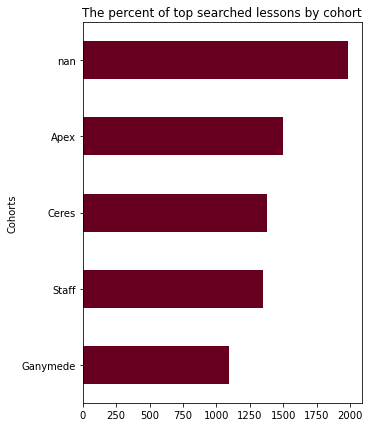

In [130]:
# Plotting the top 5 searches

json_search.name\
.value_counts(dropna=False, ascending=True)\
.tail(5).plot(kind='barh',
              colormap='RdGy',
              title= 'The percent of top searched lessons by cohort',
              figsize=(5, 7), xlabel='Cohorts')

>### **The cohort that searched 'search/search_index.json' the most does not have an ID. I will investigate this column**

In [167]:
# Creating a df of where the cohort_id has only null values 

nan_id_cohort = combined_df[combined_df['cohort_id'].isnull()]

In [168]:
nan_id_cohort.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,datetime
53122,/,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 16:46:16
53123,spring/extra-features/form-validation,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 16:46:24
53124,/,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 17:54:24
53125,/,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 18:32:03
53126,mysql/relationships/joins,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 18:32:17


In [169]:
nan_id_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52899 entries, 53122 to 900228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   path        52893 non-null  object        
 1   user_id     52893 non-null  float64       
 2   cohort_id   0 non-null      float64       
 3   ip          52893 non-null  object        
 4   name        6 non-null      object        
 5   start_date  6 non-null      object        
 6   end_date    6 non-null      object        
 7   datetime    52893 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 3.6+ MB


In [170]:
# Checking ton see if the NaN IDs correspond to a cohort name

nan_id_cohort.name.unique()

array([nan, 'Carlsbad', 'Balboa', 'Redwood', 'Ada', 'Io',
       'Placeholder for students in transition'], dtype=object)

In [171]:
# Running the column name in the function count and frequency function

value_counts_and_frequencies(nan_id_cohort.name)

,count,percent
NaN,52893,0.999887
Carlsbad,1,0.000019
Balboa,1,0.000019
Redwood,1,0.000019
Ada,1,0.000019
Io,1,0.000019
Placeholder for students in transition,1,0.000019


In [172]:
# nan_id_cohort = nan_id_cohort.set_index('datetime').sort_index()
nan_id_cohort.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,datetime
53122,/,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 16:46:16
53123,spring/extra-features/form-validation,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 16:46:24
53124,/,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 17:54:24
53125,/,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 18:32:03
53126,mysql/relationships/joins,48.0,NaN,97.105.19.61,NaN,NaN,NaN,2018-01-26 18:32:17


<AxesSubplot:>

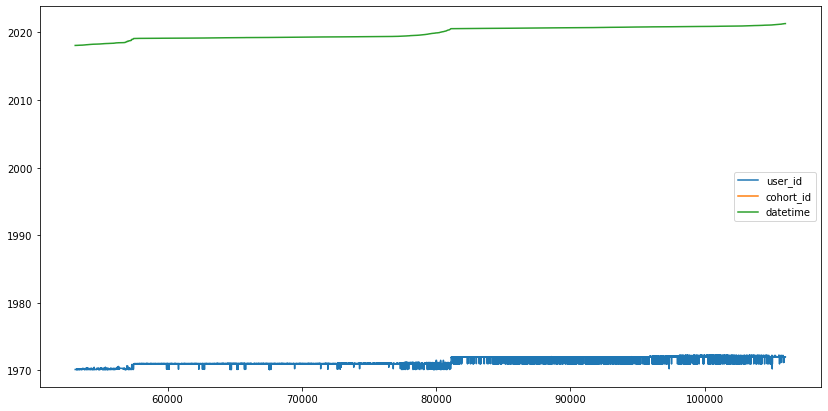

In [177]:
nan_id_cohort.plot(figsize=(14, 7))

# fig = px.bar(nan_id_cohort, x='datetime', y='cohort_id')
# fig.show()

# nan_id_cohort.plot(kind='bar')

# fig = go.Figure([go.Scatter(x=df['Date'], y=df['AAPL.High'])])
# fig.show()

# df = px.data.stocks(indexed=True)-1
# fig = px.bar(df, x=df.index, y="GOOG")
# fig.show()

>### Takeaways

        - Only 1 instance in the cohorts Carlsbad, Balboa, Redwood, Ada, Io, and Placeholder for students in transition	is an NaN
        - Cohort(s) with no name nor ID constitute 99.98% of the data
        - The Cohort with no ID nor name is responsible for most of the 'search/search_index.json'
        - I discovered that the 'search/search_index.json' do not refer to a specific lesson on json files as I thought but rather is general index

***

## *VI. Investigate the javascript-i*

>**I am going to investigate the javascript-i search which comes in third position after '/' (root directory ) and 'search/search_index.json' (general index )**

In [132]:
# Creating a column with path referring to only 'javascript-i'

java_search = combined_df.loc[combined_df['path'].str.contains('javascript-i', case=True, na=True)]
java_search.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,datetime
4,javascript-i/functions,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-01-26 10:40:15
8,javascript-i/conditionals,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-01-29 11:41:51
9,javascript-i/loops,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-01-29 11:43:08
14,javascript-i,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-01-30 10:42:10
23,javascript-i/functions,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-01-31 15:16:08


In [138]:
# Checking to see how many subqueries 'javascript-i' has

java_search.path.nunique()

53

In [145]:
# Displaying the count and frequenccy of each path searched inside 'javascript-i'

value_counts_and_frequencies(java_search.path)

,count,percent
javascript-i,18983,0.120507
javascript-ii,10730,0.068116
javascript-i/introduction/working-with-data-types-operators-and-variables,7642,0.048513
javascript-i/javascript-with-html,7350,0.046659
javascript-i/functions,7348,0.046646
javascript-i/loops,6794,0.043129
javascript-i/conditionals,6596,0.041872
javascript-ii/promises,5433,0.034490
javascript-i/arrays/manipulating,5411,0.034350
javascript-i/objects,5361,0.034032


In [179]:
# Assigning the count and frequency to a variable

A = value_counts_and_frequencies(java_search.path)
A.head()

,count,percent
javascript-i,18983,0.120507
javascript-ii,10730,0.068116
javascript-i/introduction/working-with-data-types-operators-and-variables,7642,0.048513
javascript-i/javascript-with-html,7350,0.046659
javascript-i/functions,7348,0.046646


In [180]:
# Making sure the total of lessons visited is 1 or 100%

A.percent.sum()

1.0000000000000002

>### Takeaways

        - javascript-i and javascript-ii are the top referred paths but seem to be referring to levels/modules
        - If that is the case javascript-i/introduction/working-with-data-types-operators-and-variables with 7642 references is the most referred to lesson. It constitutes 4.85% of the lessons that were referred to.


## The cohort that referred to it the most

In [192]:
# Isolating the most researched path

intro_path = java_search[java_search['path'] == 'javascript-i/introduction/\
working-with-data-types-operators-and-variables']

intro_path

,path,user_id,cohort_id,ip,name,start_date,end_date,datetime
375,javascript-i/introduction/working-with-data-ty...,1.0,8.0,172.56.15.203,Hampton,2015-09-22,2016-02-06,2018-03-19 07:44:55
389,javascript-i/introduction/working-with-data-ty...,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-03-19 11:14:05
393,javascript-i/introduction/working-with-data-ty...,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-03-19 11:23:41
396,javascript-i/introduction/working-with-data-ty...,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-03-19 12:01:26
400,javascript-i/introduction/working-with-data-ty...,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2018-03-19 12:10:25
...,...,...,...,...,...,...,...,...
900159,javascript-i/introduction/working-with-data-ty...,958.0,139.0,69.239.143.192,Oberon,2021-04-12,2021-10-01,2021-04-21 09:58:14
900164,javascript-i/introduction/working-with-data-ty...,955.0,139.0,70.121.220.245,Oberon,2021-04-12,2021-10-01,2021-04-21 10:11:33
900174,javascript-i/introduction/working-with-data-ty...,958.0,139.0,69.239.143.192,Oberon,2021-04-12,2021-10-01,2021-04-21 10:15:29
900194,javascript-i/introduction/working-with-data-ty...,957.0,139.0,76.185.197.205,Oberon,2021-04-12,2021-10-01,2021-04-21 10:27:13


In [193]:
intro_path.isnull().sum()

path            0
user_id         0
cohort_id     316
ip              0
name          316
start_date    316
end_date      316
datetime        0
dtype: int64

In [183]:
intro_path.path.nunique()

1

In [194]:
intro_path.name.nunique()

35

In [190]:
# Which cohorts inquired tho most for the most researched lesson?

value_counts_and_frequencies(intro_path.name, dropna=False).head()

,count,percent
Marco,505,0.066082
Ceres,423,0.055352
Hyperion,382,0.049987
Jupiter,362,0.047370
Zion,356,0.046585


<AxesSubplot:title={'center':'The cohort that searched the most about the top searched lesson'}, ylabel='Cohorts'>

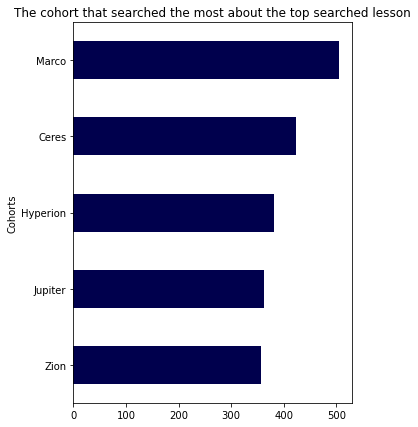

In [204]:
# Plotting the code above 

intro_path.name\
.value_counts(dropna=False, ascending=True)\
.tail(5).plot(kind='barh',
              colormap='seismic',
              title= 'The cohort that searched the most about the top searched lesson',
              figsize=(5, 7), xlabel='Cohorts')

# Conclusion

>**The Marco cohort has the most searches of 'javascript-i/introduction/working-with-data-types-operators-and-variables' with 505 searches**

***

# Organizing the code to include in Final Notebook

In [220]:
# Finding the lesson cohorts referred to the most
# Kyle the combined_df is my original df (combination of cohorts and logs)

path_df = value_counts_and_frequencies(combined_df.path)
path_df.head(20)

,count,percent
/,50313,0.055889
search/search_index.json,19519,0.021682
javascript-i,18983,0.021087
toc,18297,0.020325
java-iii,13733,0.015255
html-css,13635,0.015146
java-ii,12685,0.014091
spring,12524,0.013912
jquery,11525,0.012802
mysql,11033,0.012256


>### Takeaways

        - The top 10 searches are root directories, general indices, modules, and the appendix
        - The first lesson searched has the following path:
            'javascript-i/introduction/working-with-data-types-operators-and-variables'

## Which cohorts inquired the most for the lesson 'javascript-i/introduction/working-with-data-types-operators-and-variables'?

In [221]:
# Isolating the most searched 'javascript-i' extension

intro_path = java_search[java_search['path'] == 'javascript-i/introduction/\
working-with-data-types-operators-and-variables']

In [210]:
# Which cohorts inquired tho most for the most researched lesson?

value_counts_and_frequencies(intro_path.name, dropna=False).head()

,count,percent
Marco,505,0.066082
Ceres,423,0.055352
Hyperion,382,0.049987
Jupiter,362,0.047370
Zion,356,0.046585


<AxesSubplot:title={'center':'The cohort that searched the most about the top searched lessons'}, ylabel='Cohorts'>

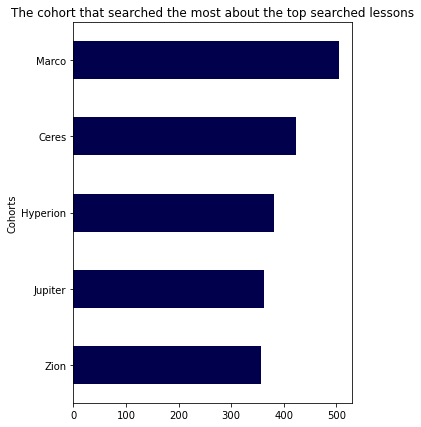

In [211]:
# Plotting the code above 

intro_path.name\
.value_counts(dropna=False, ascending=True)\
.tail(5).plot(kind='barh',
              colormap='seismic',
              title= 'The cohort that searched the most about the top searched lessons',
              figsize=(5, 7), xlabel='Cohorts')

# Conclusion

>**The Marco cohort has the most searches of 'javascript-i/introduction/working-with-data-types-operators-and-variables' with 505 searches**